In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from jupyterthemes import jtplot ; jtplot.style() 

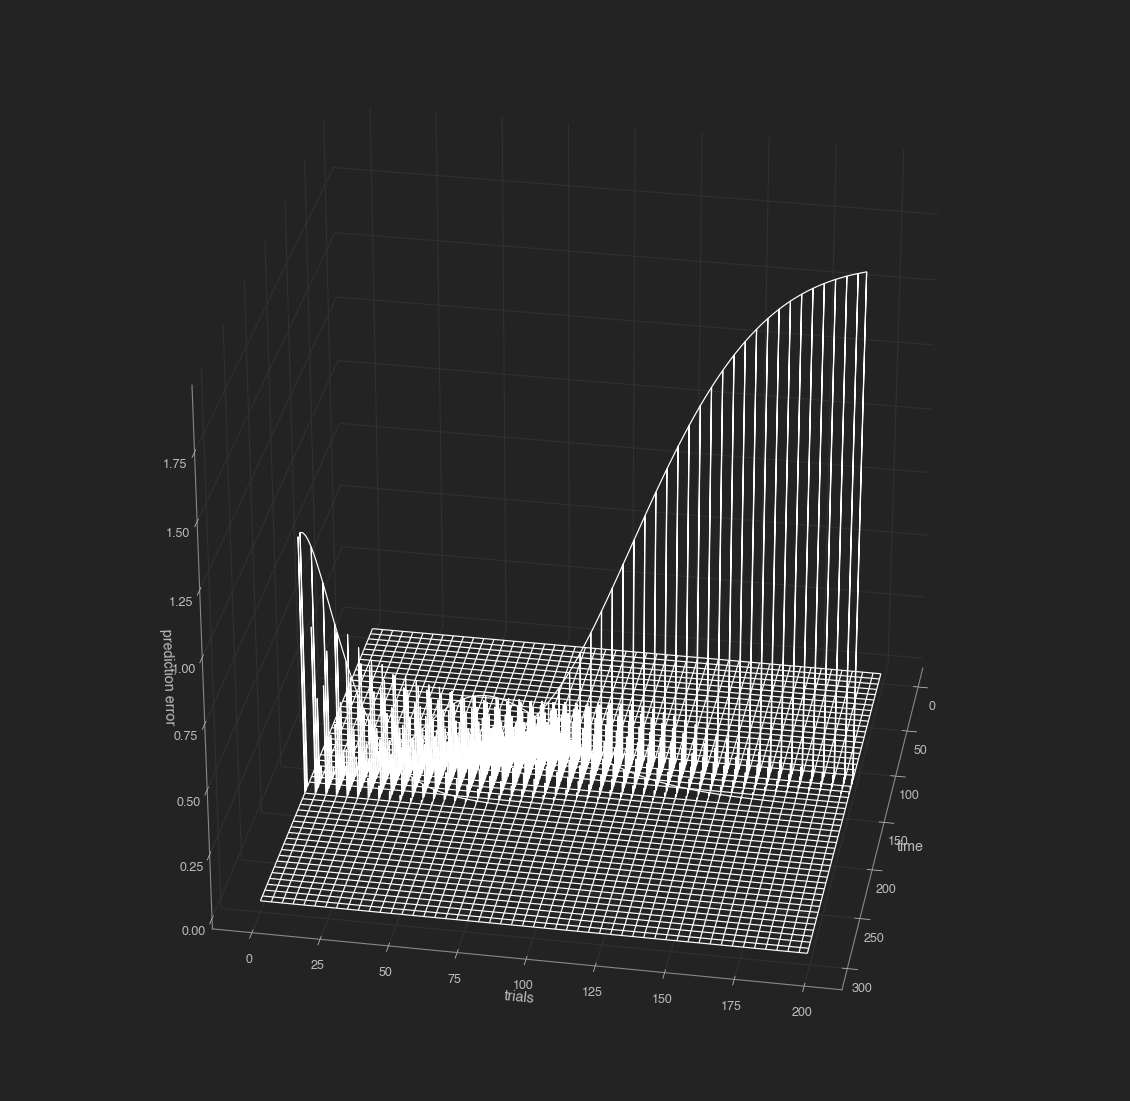

In [6]:
n = 200 
p = [0.0, 1] 
q = [0.0 , 1]
epsilon = 0.02

t_reward = 180 # time of reward
t_stimulus = 120 # time of stim 
t_per_trl = 300 # time per trial

w = np.zeros((t_per_trl))
u = np.zeros(t_per_trl)
u[t_stimulus: t_stimulus + 5] = 1 # 5 second stimulus 

r = np.zeros((n, t_per_trl))
r[:, t_reward:t_reward + 10] = 1 # 10 seconds of reward
v = np.zeros((n, t_per_trl))
delta = np.zeros((n, t_per_trl))
delta_t = 5
delta_over_time = np.zeros(n) 
time_of_error = np.zeros(n) 
w = np.zeros((t_per_trl))

for trial in range(n) : 
    for t in range(0, t_per_trl, delta_t) : 
        if t == 0 : 
            continue
        if t == t_per_trl - delta_t : 
            break 
        v[trial, t] = np.dot(w[:t], np.flip(u[:t])) # flip the slice of the stimulus vector u in order to use the ith entry of w as the weight of a distance in time from the onset of the stimulus 
        v[trial, t + delta_t] = np.dot(w[:t + delta_t], np.flip(u[:t + delta_t]))
        delta[trial, t] = r[trial, t] + v[trial, t + delta_t] - v[trial, t] 

        w[:t] = w[:t]+ epsilon*delta[trial, t]*np.flip(u[:t])
    delta_over_time[trial] = delta[trial, :].max()

x = np.arange(t_per_trl) 
y = np.arange(n)
x, y = np.meshgrid(x, y) 

fig = plt.figure(figsize = (20, 20))
ax = fig.gca(projection = '3d', azim = 10) # Since the weights are now specific to certain time distances from the stimulus, we're more interested in the time of the peak of the surprise
ax.plot_wireframe(x, y, delta,  color = 'w', rcount = 50, ccount = 50) #cmap = 'twilight_shifted_r') 
ax.set_xlabel('time')
ax.set_ylabel('trials')
ax.set_zlabel('prediction error')
ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))